In [3]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap, NLocal
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np

Enter filename: e1200.csv


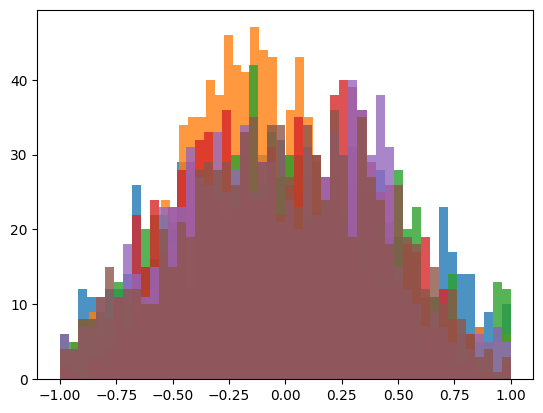

In [7]:
%run preprocess.py

In [8]:
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

In [9]:
print(len(train_data),len(test_data))

379 570


# Classical SVM training and testing

In [12]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import classification_report, confusion_matrix
from time import time
print("*** Training a classical SVM classifier with rbf Kernel ***")
train_labels_svm = train_labels
test_labels_svm = test_labels
clf = svm.SVC(kernel='rbf')
start_time = time()
clf.fit(train_data, train_labels_svm)
end_time = time()
duration = end_time - start_time
print("training time for classical SVM : ", duration)
y_pred=clf.predict(test_data)
print(confusion_matrix(test_labels_svm, y_pred))
print(classification_report(test_labels_svm, y_pred))

*** Training a classical SVM classifier with rbf Kernel ***
training time for classical SVM :  0.020252466201782227
[[164 124]
 [ 87 195]]
              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61       288
         1.0       0.61      0.69      0.65       282

    accuracy                           0.63       570
   macro avg       0.63      0.63      0.63       570
weighted avg       0.63      0.63      0.63       570



# Variational Quantum Classifier trained and tested on same data

In [13]:
seed = 1376
#algorithm_globals.random_seed = seed
feature_dim = train_data.shape[1]
#print(feature_dim)
feature_map = ZZFeatureMap(feature_dim)
ansatz = TwoLocal(feature_dim, ['ry', 'rz'], 'cz', reps = 2)

vqc = VQC(feature_map=feature_map,
                 ansatz=ansatz,
                 optimizer=COBYLA(maxiter=100),
                 quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                                 seed_simulator=seed,
                                                 seed_transpiler=seed)
                 )


C:\Users\sai sakunthala\AppData\Local\Temp\ipykernel_15340\1822942454.py:11: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
C:\Users\sai sakunthala\AppData\Local\Temp\ipykernel_15340\1822942454.py:8: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.
  vqc = VQC(feature_map=feature_map,


In [14]:
start_time = time()
print("training_data", train_data.shape)
vqc.fit(train_data, train_labels)
end_time = time()
duration = end_time - start_time
print("training time : ", duration)

training_data (379, 6)


C:\Users\sai sakunthala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


training time :  2424.58619761467


In [15]:
start_time1 = time()
y_pred = vqc.predict(test_data)
end_time1 = time()
duration1 = end_time1 - start_time1
print("testing time : ", duration1)
#print(classification_report(test_labels,y_pred_1))

testing time :  35.5388708114624


In [17]:
final_pred=y_pred

In [18]:
print(classification_report(test_labels_svm,final_pred))
confusion_matrix(test_labels_svm,final_pred)

              precision    recall  f1-score   support

         0.0       0.50      0.48      0.49       288
         1.0       0.49      0.51      0.50       282

    accuracy                           0.49       570
   macro avg       0.49      0.49      0.49       570
weighted avg       0.49      0.49      0.49       570



array([[137, 151],
       [137, 145]], dtype=int64)